In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('C://Users//Andrew/Desktop/')

In [3]:
df = pd.read_csv('calhousing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(df.shape)

(20640, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


###  Missing values

Only 1 percent of values missing from the total_bedrooms column

In [10]:
def miss_val_percentage(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    
    percentage = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)
    
    return pd.concat([total, percentage], axis = 1, keys = ['Total Values Missing', 'Percentage'])

In [11]:
miss_val_percentage(df)

,Total Values Missing,Percentage
total_bedrooms,207,1.0
ocean_proximity,0,0.0
median_house_value,0,0.0
median_income,0,0.0
households,0,0.0
population,0,0.0
total_rooms,0,0.0
housing_median_age,0,0.0
latitude,0,0.0
longitude,0,0.0


In [14]:
missing_value_vars = [var for var in df.columns if df[var].isnull().sum() > 0]

In [15]:
df[missing_value_vars].isnull().mean()

total_bedrooms    0.010029
dtype: float64

Comparing the median house value for observations where data was missing
 - Should be very little deviation in median house value considering the only 1% of values are missing from the total bedrooms column

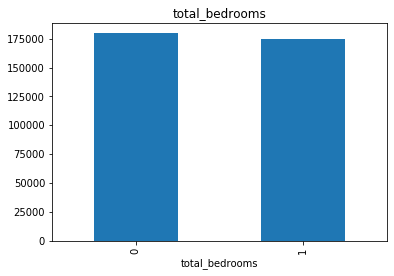

In [16]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)['median_house_value'].median().plot.bar()

    plt.title(var)
    plt.show()


for var in missing_value_vars:
    analyse_na_value(df, var)

In [24]:
corr = df.corr()
corr = corr.median_house_value.sort_values(ascending=True)
corr_df = pd.DataFrame({'Variable': corr.index, 'Correlation with median house value':corr.values})
corr_df

,Variable,Correlation with median house value
0,latitude,-0.144160
1,longitude,-0.045967
2,population,-0.024650
3,total_bedrooms,0.049686
4,households,0.065843
5,housing_median_age,0.105623
6,total_rooms,0.134153
7,median_income,0.688075
8,median_house_value,1.000000


To be continued...